In [12]:
import pandas as pd
from bunkatech.bunka_class import Bunka

In [13]:
path = '/Users/charlesdedampierre/Desktop/ENS Projects/humility'

In [14]:
data = pd.read_csv(path+'/final_annotations/charles_jan_noemon_final_annotations.csv', sep = '\t')
data = data[['com_id', 'body']]

In [15]:
raw = pd.read_csv(path+'/raw_data/comments_top_askscience.csv', sep = '\t')
raw = raw.sample(10000, random_state = 42)

In [16]:
bunka = Bunka(
        data=raw,
        text_var="body",
        index_var="id",
        extract_terms=True,
        terms_embedding=True,
        docs_embedding=False,
        sample_size_terms=5000,
        terms_limit=10000,
        terms_ents=False,
        terms_ngrams=(1, 2),
        terms_ncs=False,
        terms_include_pos = None, 
        #terms_include_pos=["NOUN", "PROPN", "ADJ"],
        #terms_include_types=["PERSON", "ORG"],
        terms_embedding_model="/Users/charlesdedampierre/Desktop/all-MiniLM-L6-v2",
        docs_embedding_model="/Users/charlesdedampierre/Desktop/all-MiniLM-L6-v2",
        language="en",
        terms_path=None,
        terms_embeddings_path=None,
        docs_embeddings_path=None,
        docs_dimension_reduction=5,
    )

Extract Terms: 100%|██████████████████████████████████████████████████████| 5000/5000 [02:40<00:00, 31.25it/s]
2022-03-24 10:55:55,036 - INFO : Load pretrained SentenceTransformer: /Users/charlesdedampierre/Desktop/all-MiniLM-L6-v2
2022-03-24 10:55:55,291 - INFO : Use pytorch device: cpu


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [17]:
bunka.terms.to_csv(path + '/terms.csv')
bunka.terms_embeddings.to_csv(path + '/terms_embeddings.csv')

In [49]:
bunka.df_bert

,like,time,know,people,way,things,think,year,question,work,...,comments asking,parking,mealworms,commencing,small antenna,pectoral muscle,small air,spacesuit gets,goggles,hometown
like,1.000000,0.329310,0.383915,0.249803,0.441232,0.331665,0.386749,0.274321,0.372734,0.282698,...,0.334865,0.180020,0.102242,0.124460,0.099475,0.105766,0.219833,0.224456,0.236241,0.163797
time,0.329310,1.000000,0.206949,0.302949,0.276367,0.408220,0.387736,0.400923,0.397199,0.464877,...,0.298978,0.232408,0.099309,0.208998,0.126113,0.133485,0.210293,0.187901,0.217247,0.249152
know,0.383915,0.206949,1.000000,0.198900,0.447064,0.265039,0.409983,0.222818,0.383872,0.271384,...,0.299822,0.177964,0.068677,0.137492,0.061341,0.077449,0.166962,0.134152,0.118246,0.233390
people,0.249803,0.302949,0.198900,1.000000,0.191916,0.421238,0.299939,0.254652,0.388957,0.361451,...,0.286301,0.337412,0.188506,0.177583,0.099910,0.113189,0.217168,0.193943,0.288940,0.289415
way,0.441232,0.276367,0.447064,0.191916,1.000000,0.210081,0.420072,0.272157,0.409259,0.302018,...,0.336930,0.163494,0.098405,0.169559,0.031403,0.123454,0.135240,0.272361,0.180513,0.221110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spacesuit gets,0.224456,0.187901,0.134152,0.193943,0.272361,0.260957,0.164949,0.208461,0.239719,0.244413,...,0.238472,0.241697,0.124560,0.135051,0.066586,0.258747,0.225545,1.000000,0.348313,0.125118
goggles,0.236241,0.217247,0.118246,0.288940,0.180513,0.373772,0.209501,0.197360,0.260199,0.206490,...,0.221587,0.146291,0.141363,0.147155,0.029867,0.155213,0.220950,0.348313,1.000000,0.149561
hometown,0.163797,0.249152,0.233390,0.289415,0.221110,0.261230,0.145027,0.320664,0.285236,0.228557,...,0.187670,0.318621,0.028583,0.129757,0.101285,0.043418,0.151567,0.125118,0.149561,1.000000
love,0.316918,0.428489,0.303264,0.317696,0.309009,0.387530,0.328571,0.326708,0.357723,0.413559,...,0.242414,0.229068,0.081015,0.215478,0.072150,0.087109,0.194420,0.153502,0.196857,0.259989


In [53]:
word = 'love'
word_2 = 'hate'
test = bunka.df_bert.copy()
test['diff'] = test[word] -  test[word_2]
test[['diff']].sort_values(['diff'], ascending = True).head(30)

,diff
hate,-0.511850
hate,-0.511850
criticism,-0.282226
terrible,-0.278009
ignorant,-0.258624
ignorance,-0.240590
frustrating,-0.238784
criticize,-0.236024
bother,-0.235699
awful,-0.234019


2022-03-24 12:32:14,355 - INFO : Load pretrained SentenceTransformer: /Users/charlesdedampierre/Desktop/all-MiniLM-L6-v2
2022-03-24 12:32:14,623 - INFO : Use pytorch device: cpu


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/charlesdedampierre/opt/anaconda3/envs/bunka/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

invalid value encountered in sqrt



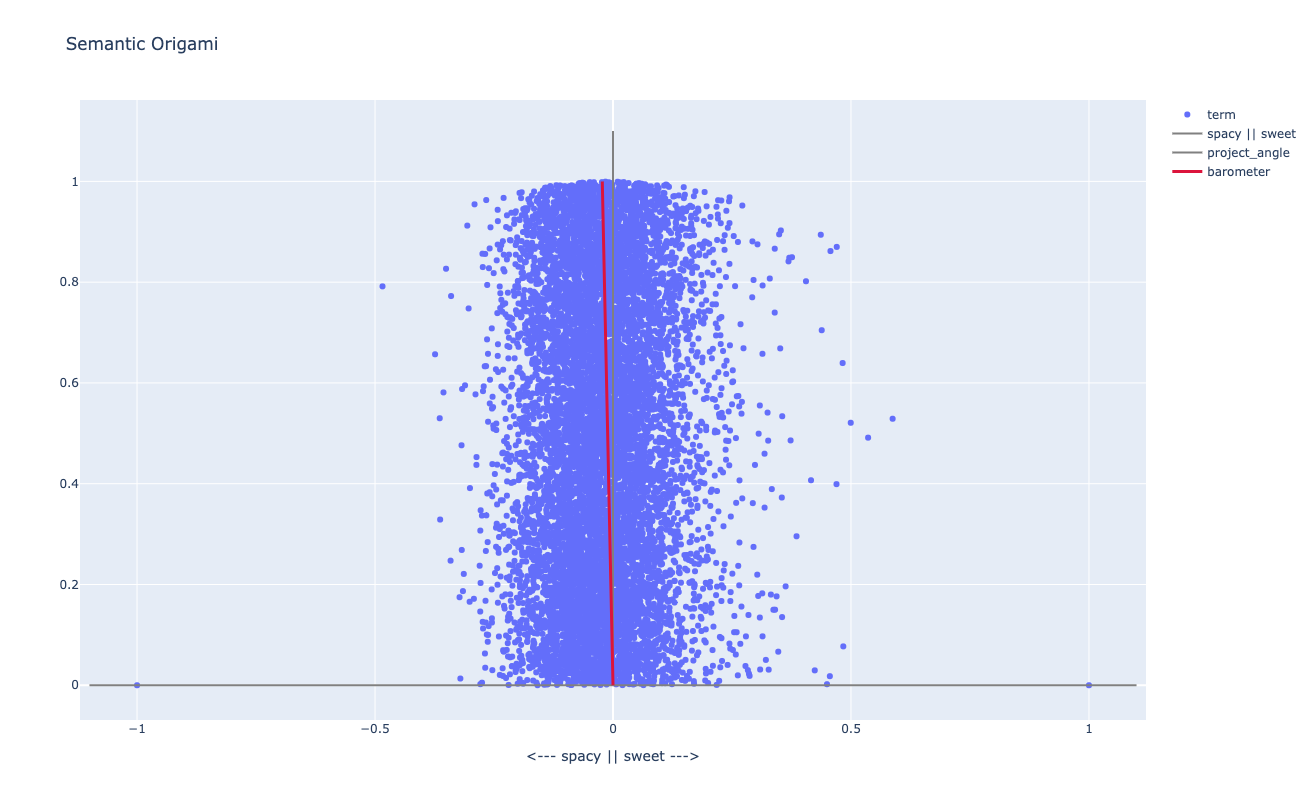

In [ ]:
left_axis= ['humility', 
            'shyness',
            'abasement',
            'bashfulness',
           'demureness',
            'diffidence',
            'docility',
            'lowliness']

left_axis = ['sweet']


right_axis = ['arrogance', 
              'boldness',
            'confidence',
            'arrogance',
            'assertiveness',
            'egoism',
            'pretentiousness',
            'pride',
            'self-importance']

right_axis = ['spacy']

fig = bunka.origami_projection_unique(
                    left_axis= left_axis,
                    right_axis = right_axis,
                    height=800,
                    width=4000,
                    type="terms",
                    dispersion=True,
                    barometer=True,
                    explainer = True
    
                )
fig.show()

In [22]:
import plotly

In [57]:
plotly.offline.plot(fig, filename=path +'/matrix_love_hate_terms.html')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


'/Users/charlesdedampierre/Desktop/ENS Projects/humility/matrix_love_hate_terms.html'

#### enhance naming

In [46]:
from bunkatech.topic_modeling.hierarchical_clusters import hierarchical_clusters


In [47]:
h_clusters = hierarchical_clusters(bunka.docs_embeddings.reset_index())

AttributeError: 'Bunka' object has no attribute 'docs_embeddings'